# Census Income
Project Description
This data was extracted from the 1994 Census bureau database by Ronny Kohavi and Barry Becker (Data Mining and Visualization, Silicon Graphics). A set of reasonably clean records was extracted using the following conditions: ((AAGE>16) && (AGI>100) && (AFNLWGT>1) && (HRSWK>0)). The prediction task is to determine whether a person makes over $50K a year.
Description of fnlwgt (final weight)
The weights on the Current Population Survey (CPS) files are controlled to independent estimates of the civilian non-institutional population of the US. These are prepared monthly for us by Population Division here at the Census Bureau. We use 3 sets of controls. These are:
1.	A single cell estimate of the population 16+ for each state.
2.	Controls for Hispanic Origin by age and sex.
3.	Controls by Race, age and sex.
We use all three sets of controls in our weighting program and "rake" through them 6 times so that by the end we come back to all the controls we used. The term estimate refers to population totals derived from CPS by creating "weighted tallies" of any specified socio-economic characteristics of the population. People with similar demographic characteristics should have similar weights. There is one important caveat to remember about this statement. That is that since the CPS sample is actually a collection of 51 state samples, each with its own probability of selection, the statement only applies within state.


In [1]:
# Importing all the Required Libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')
pd.set_option('display.max_columns',None)
import os
from sklearn.model_selection import train_test_split
# Build the Regression / Regressor models

from sklearn.linear_model import LinearRegression
from sklearn.linear_model import Ridge
from sklearn import linear_model
from sklearn.tree import DecisionTreeRegressor
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestRegressor
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVR
import xgboost as xgb
from sklearn.neighbors import KNeighborsRegressor
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import ExtraTreesRegressor
from sklearn.ensemble import ExtraTreesClassifier
from sklearn.ensemble import BaggingRegressor
from sklearn.ensemble import BaggingClassifier
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.ensemble import GradientBoostingClassifier
from statsmodels.stats.outliers_influence import variance_inflation_factor
from sklearn.preprocessing import LabelEncoder
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score
from sklearn.metrics import f1_score
from sklearn.metrics import roc_auc_score

In [2]:
df=pd.read_csv("census_income.csv")
df.head()

,Age,Workclass,Fnlwgt,Education,Education_num,Marital_status,Occupation,Relationship,Race,Sex,Capital_gain,Capital_loss,Hours_per_week,Native_country,Income
0,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K
1,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K
2,53,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,<=50K
3,28,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,<=50K
4,37,Private,284582,Masters,14,Married-civ-spouse,Exec-managerial,Wife,White,Female,0,0,40,United-States,<=50K


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32560 entries, 0 to 32559
Data columns (total 15 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   Age             32560 non-null  int64 
 1   Workclass       32560 non-null  object
 2   Fnlwgt          32560 non-null  int64 
 3   Education       32560 non-null  object
 4   Education_num   32560 non-null  int64 
 5   Marital_status  32560 non-null  object
 6   Occupation      32560 non-null  object
 7   Relationship    32560 non-null  object
 8   Race            32560 non-null  object
 9   Sex             32560 non-null  object
 10  Capital_gain    32560 non-null  int64 
 11  Capital_loss    32560 non-null  int64 
 12  Hours_per_week  32560 non-null  int64 
 13  Native_country  32560 non-null  object
 14  Income          32560 non-null  object
dtypes: int64(6), object(9)
memory usage: 3.7+ MB


In [33]:
# Replace ' ?' with NaN
df.replace(' ?', float('nan'), inplace=True)

# Drop rows containing NaN values
df= df.dropna()

No Null data

In [34]:
df.describe()

,Age,Fnlwgt,Education_num,Capital_gain,Capital_loss,Hours_per_week
count,30161.000000,3.016100e+04,30161.000000,30161.000000,30161.000000,30161.000000
mean,38.437883,1.897976e+05,10.121216,1091.971984,88.375419,40.931269
std,13.134882,1.056527e+05,2.549983,7406.466659,404.304753,11.980182
min,17.000000,1.376900e+04,1.000000,0.000000,0.000000,1.000000
25%,28.000000,1.176280e+05,9.000000,0.000000,0.000000,40.000000
50%,37.000000,1.784290e+05,10.000000,0.000000,0.000000,40.000000
75%,47.000000,2.376300e+05,13.000000,0.000000,0.000000,45.000000
max,90.000000,1.484705e+06,16.000000,99999.000000,4356.000000,99.000000


# Exploratory Data analysis

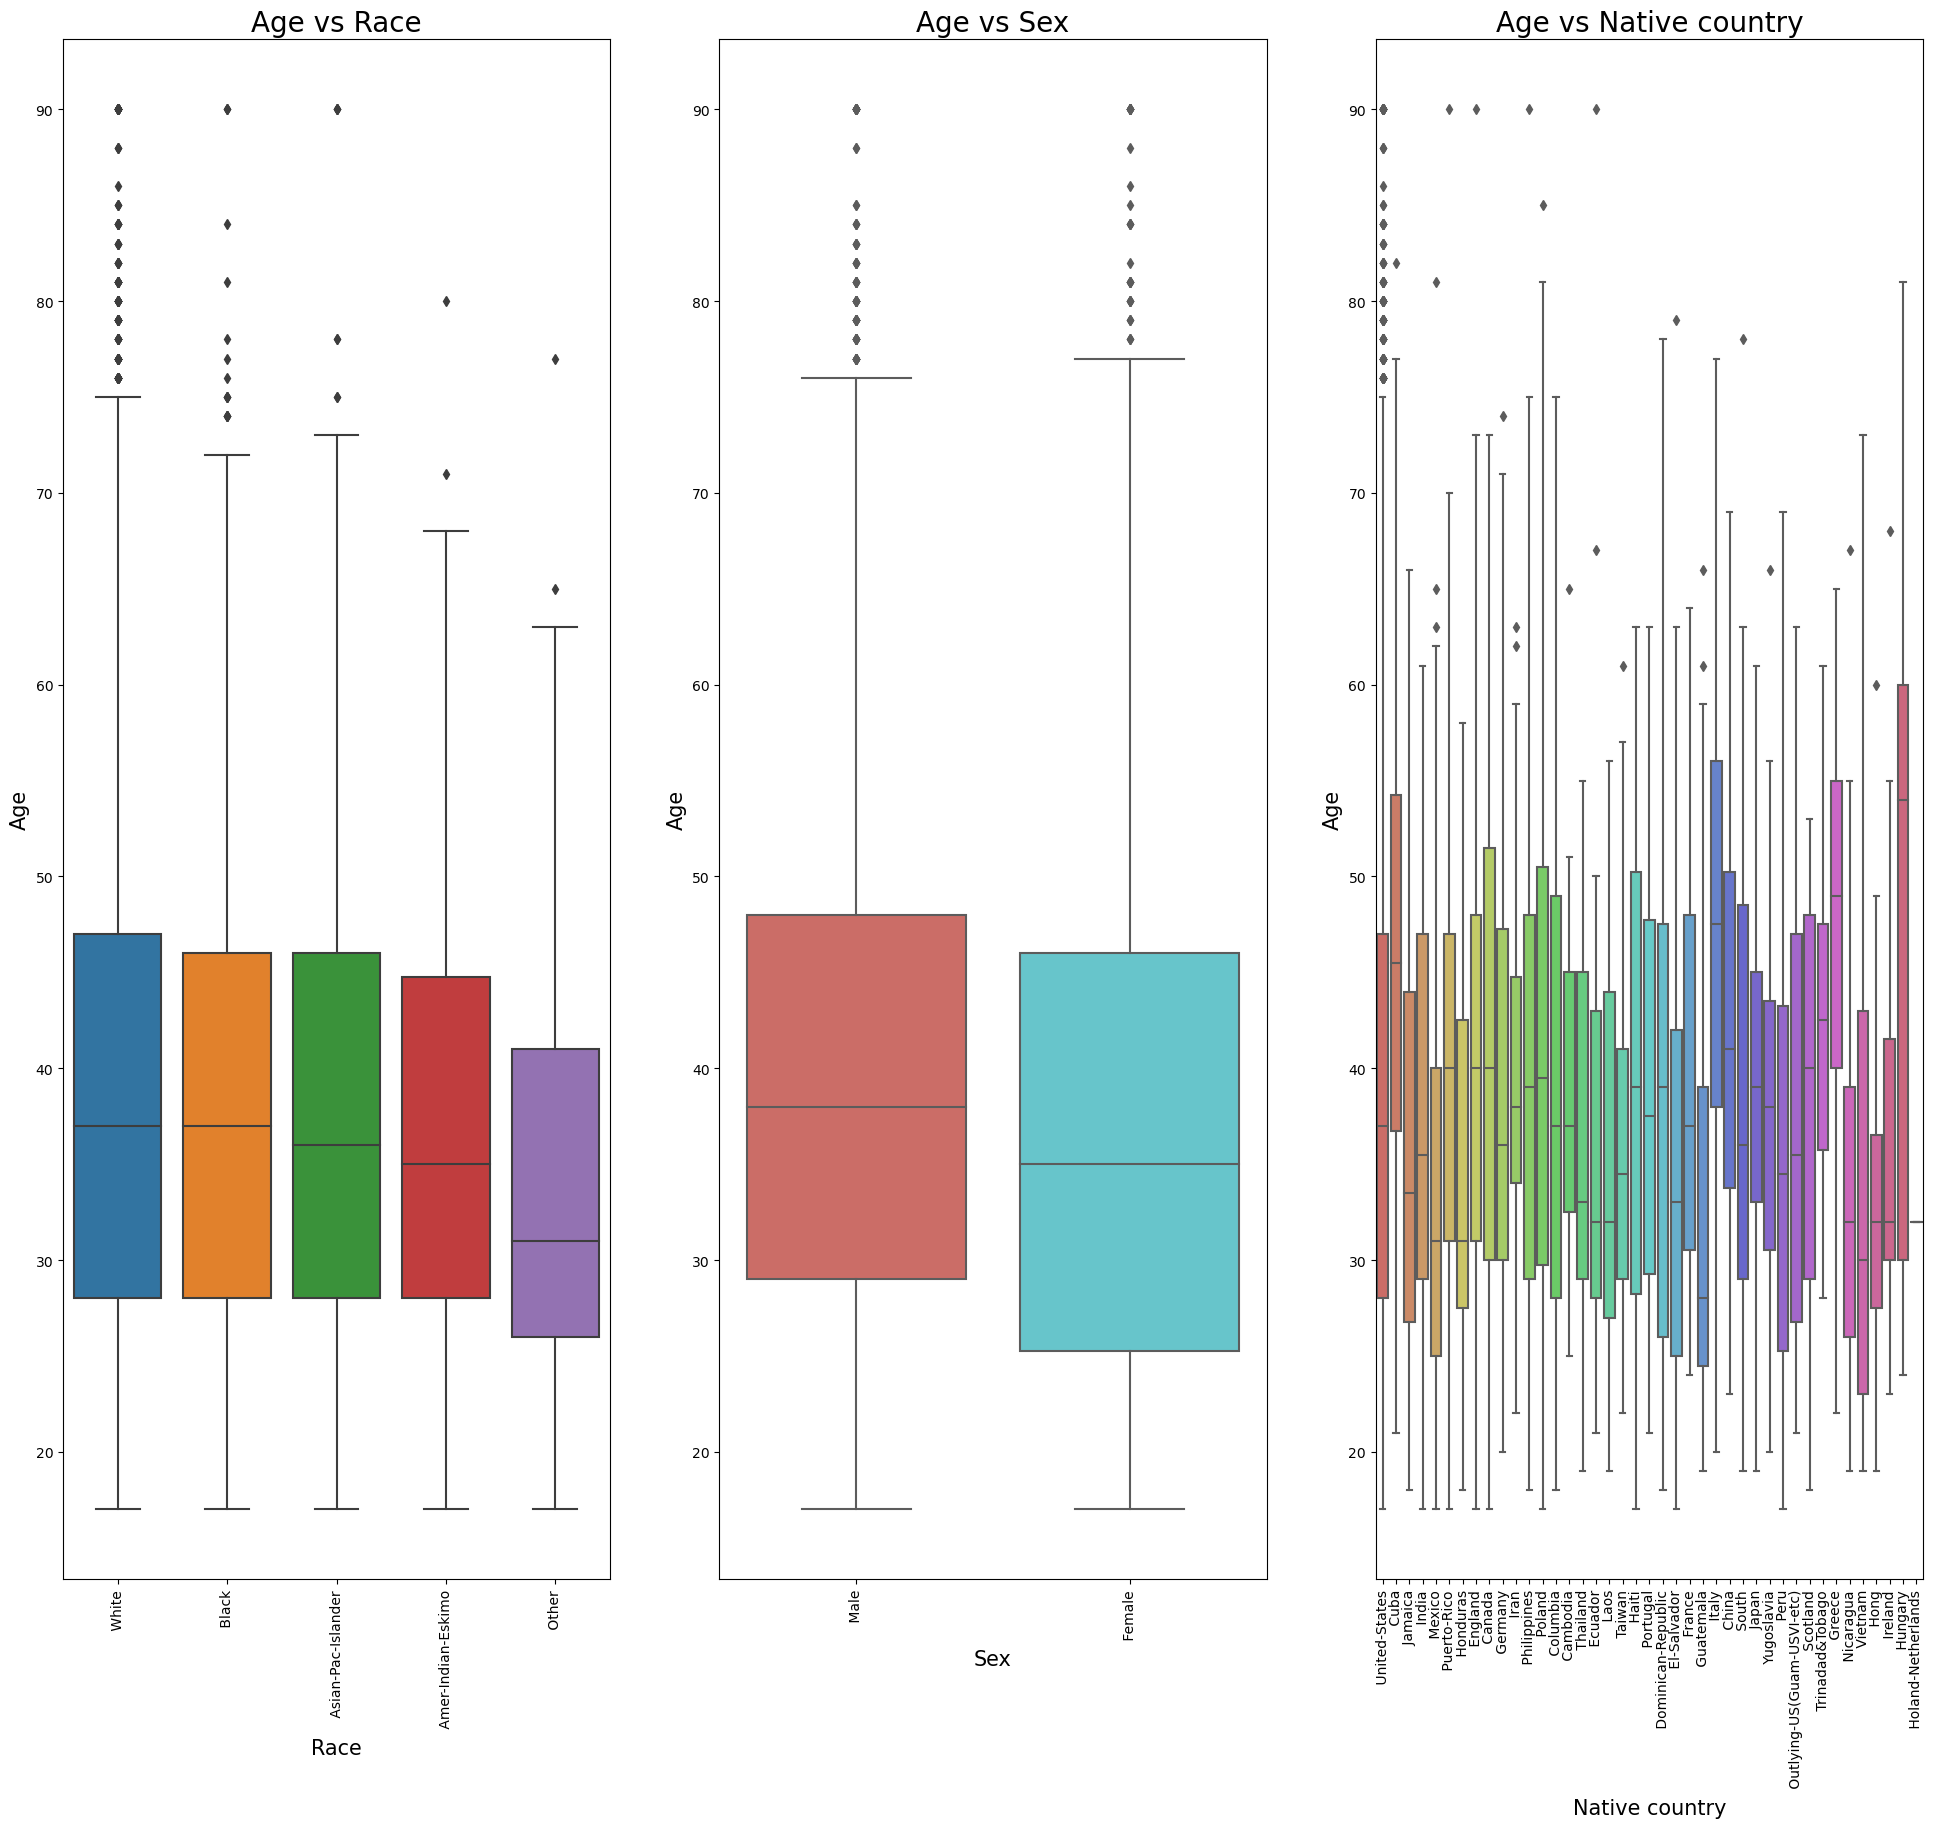

In [35]:
plt.figure(figsize=(24,20))
plt.subplot(1,3,1)
sns.boxplot(x='Race',y='Age',data=df)
plt.title('Age vs Race',fontsize=20)
plt.xlabel('Race',fontsize=15)
plt.ylabel('Age',fontsize=15)
plt.xticks(rotation=90)
plt.subplot(1,3,2)
sns.boxplot(x='Sex',y='Age',data=df,palette='hls')
plt.title('Age vs Sex',fontsize=20)
plt.xlabel('Sex',fontsize=15)
plt.ylabel('Age',fontsize=15)
plt.xticks(rotation=90)
plt.subplot(1,3,3)
sns.boxplot(x='Native_country',y='Age',data=df,palette='hls')
plt.title('Age vs Native country',fontsize=20)
plt.xlabel('Native country',fontsize=15)
plt.xticks(rotation=90)
plt.ylabel('Age',fontsize=15)
plt.show()

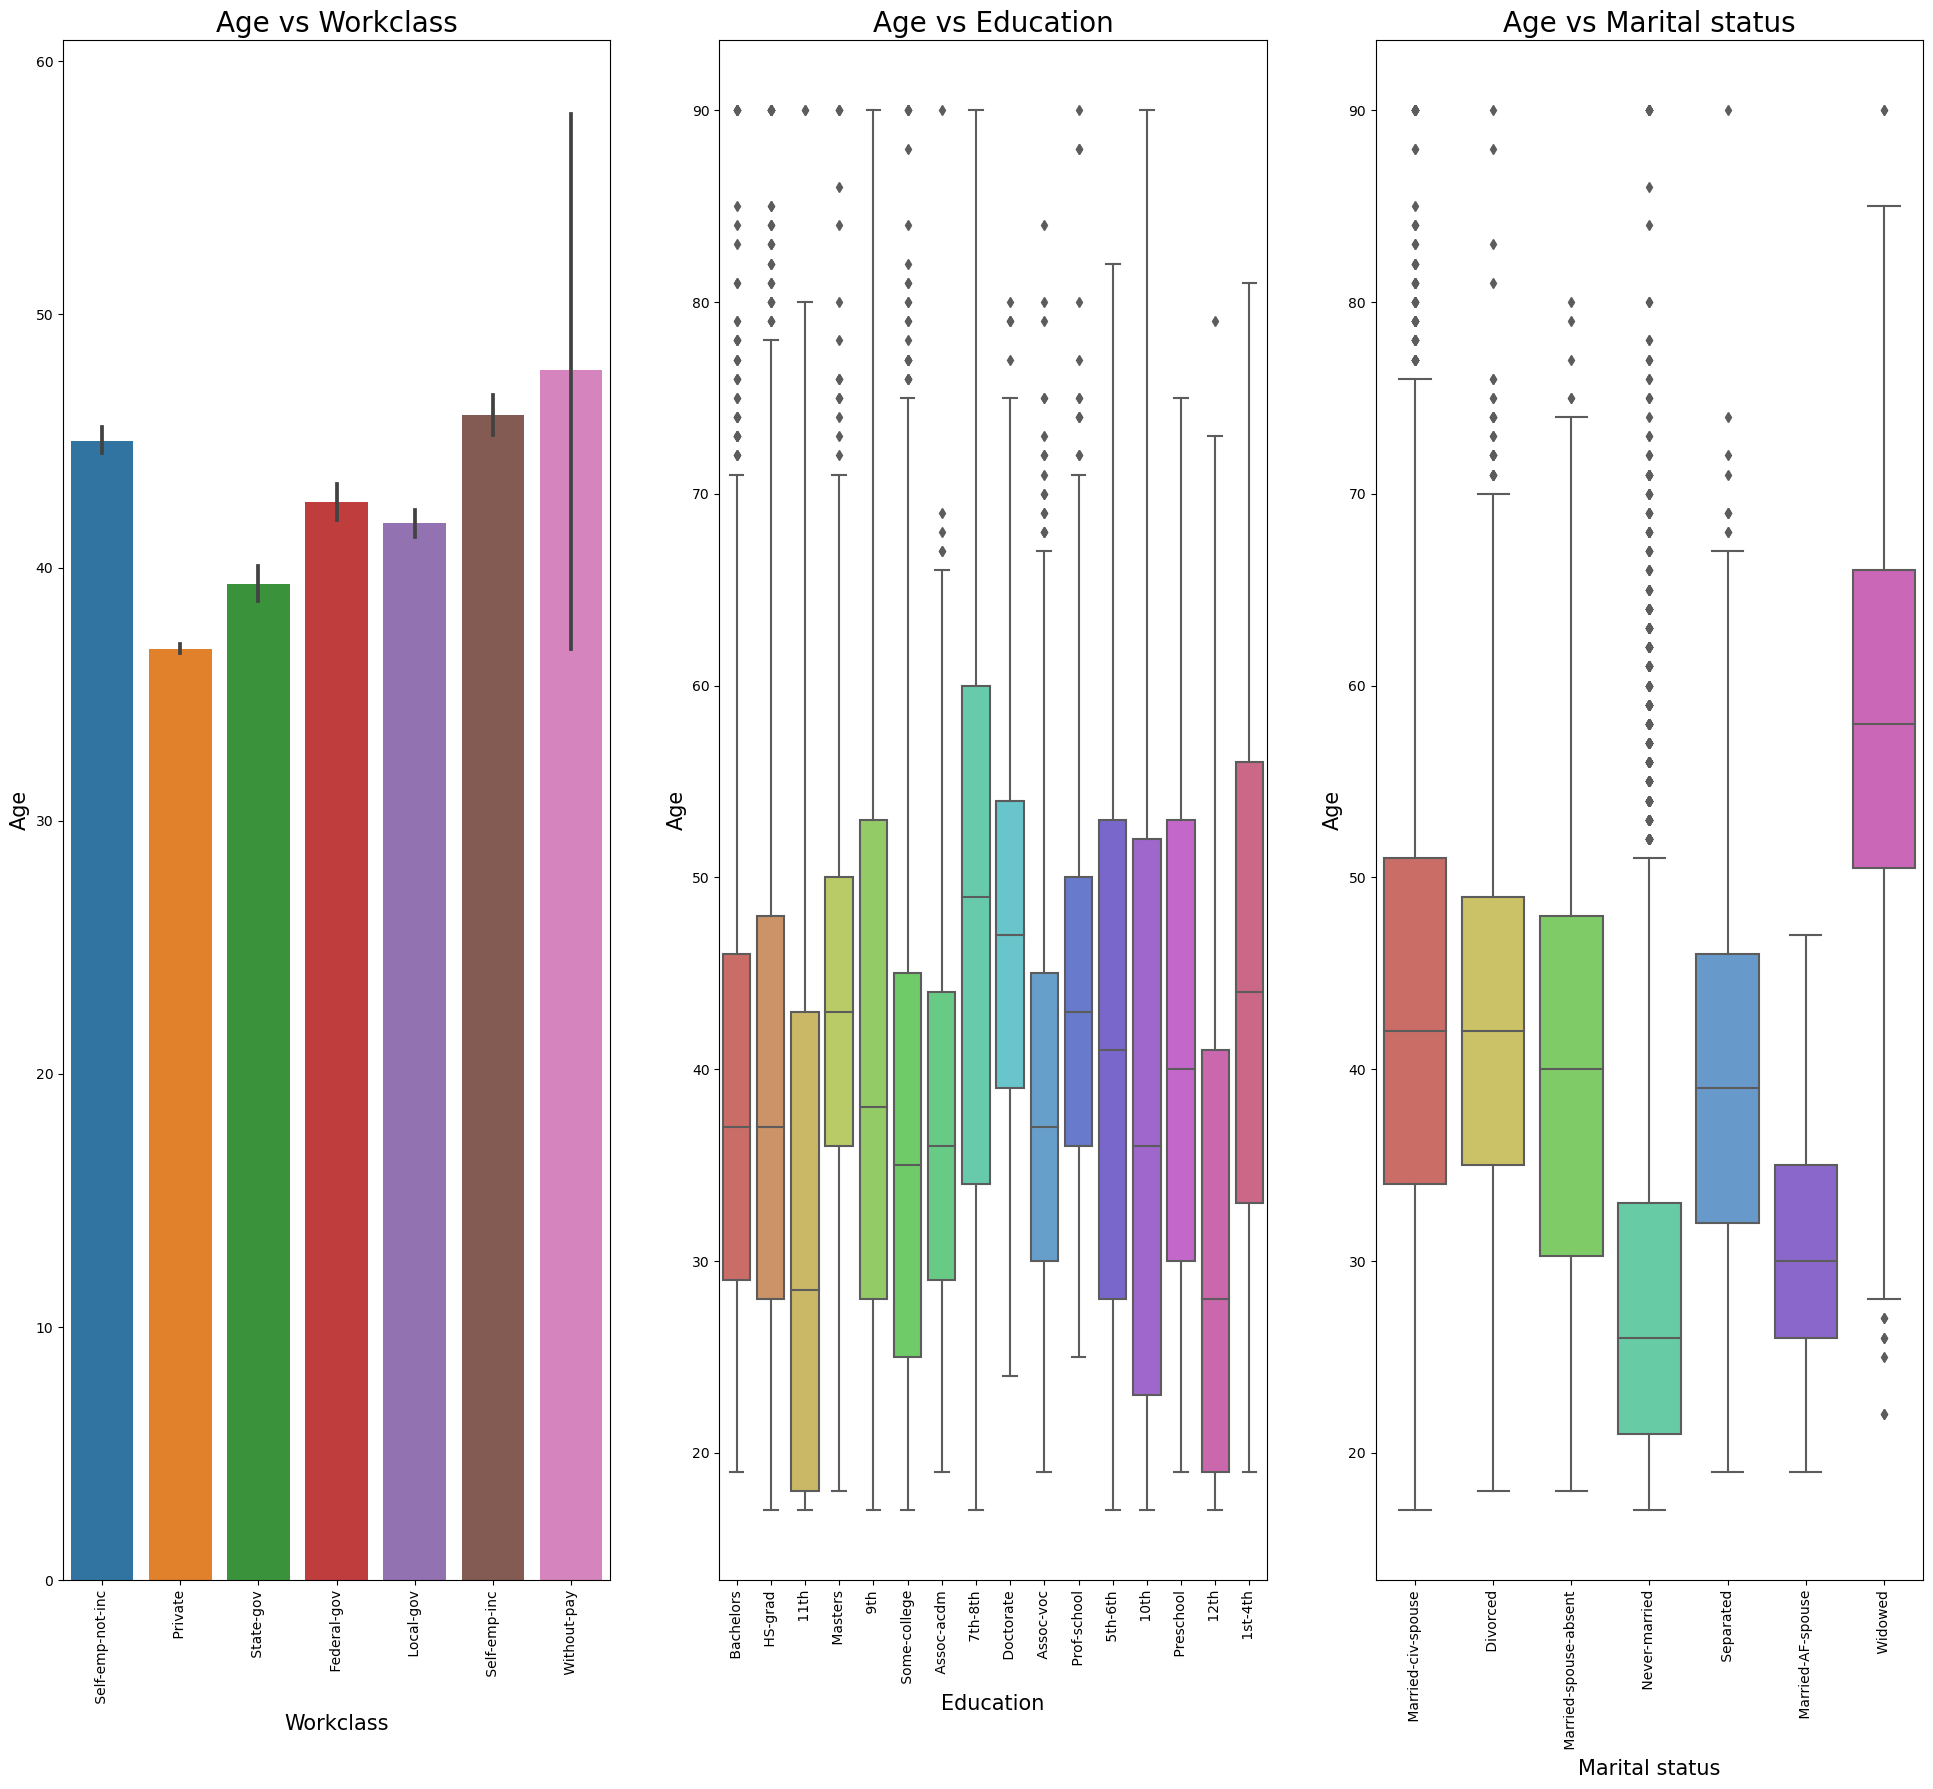

In [36]:
plt.figure(figsize=(24,20))
plt.subplot(1,3,1)
sns.barplot(x='Workclass',y='Age',data=df)
plt.title('Age vs Workclass',fontsize=20)
plt.xlabel('Workclass',fontsize=15)
plt.ylabel('Age',fontsize=15)
plt.xticks(rotation=90)
plt.subplot(1,3,2)
sns.boxplot(x='Education',y='Age',data=df,palette='hls')
plt.title('Age vs Education',fontsize=20)
plt.xlabel('Education',fontsize=15)
plt.ylabel('Age',fontsize=15)
plt.xticks(rotation=90)
plt.subplot(1,3,3)
sns.boxplot(x='Marital_status',y='Age',data=df,palette='hls')
plt.title('Age vs Marital status',fontsize=20)
plt.xlabel('Marital status',fontsize=15)
plt.xticks(rotation=90)
plt.ylabel('Age',fontsize=15)
plt.show()

Inference:
1) Average male is elder than female
2) Cuba has the highest median age and Ecuador with lowest


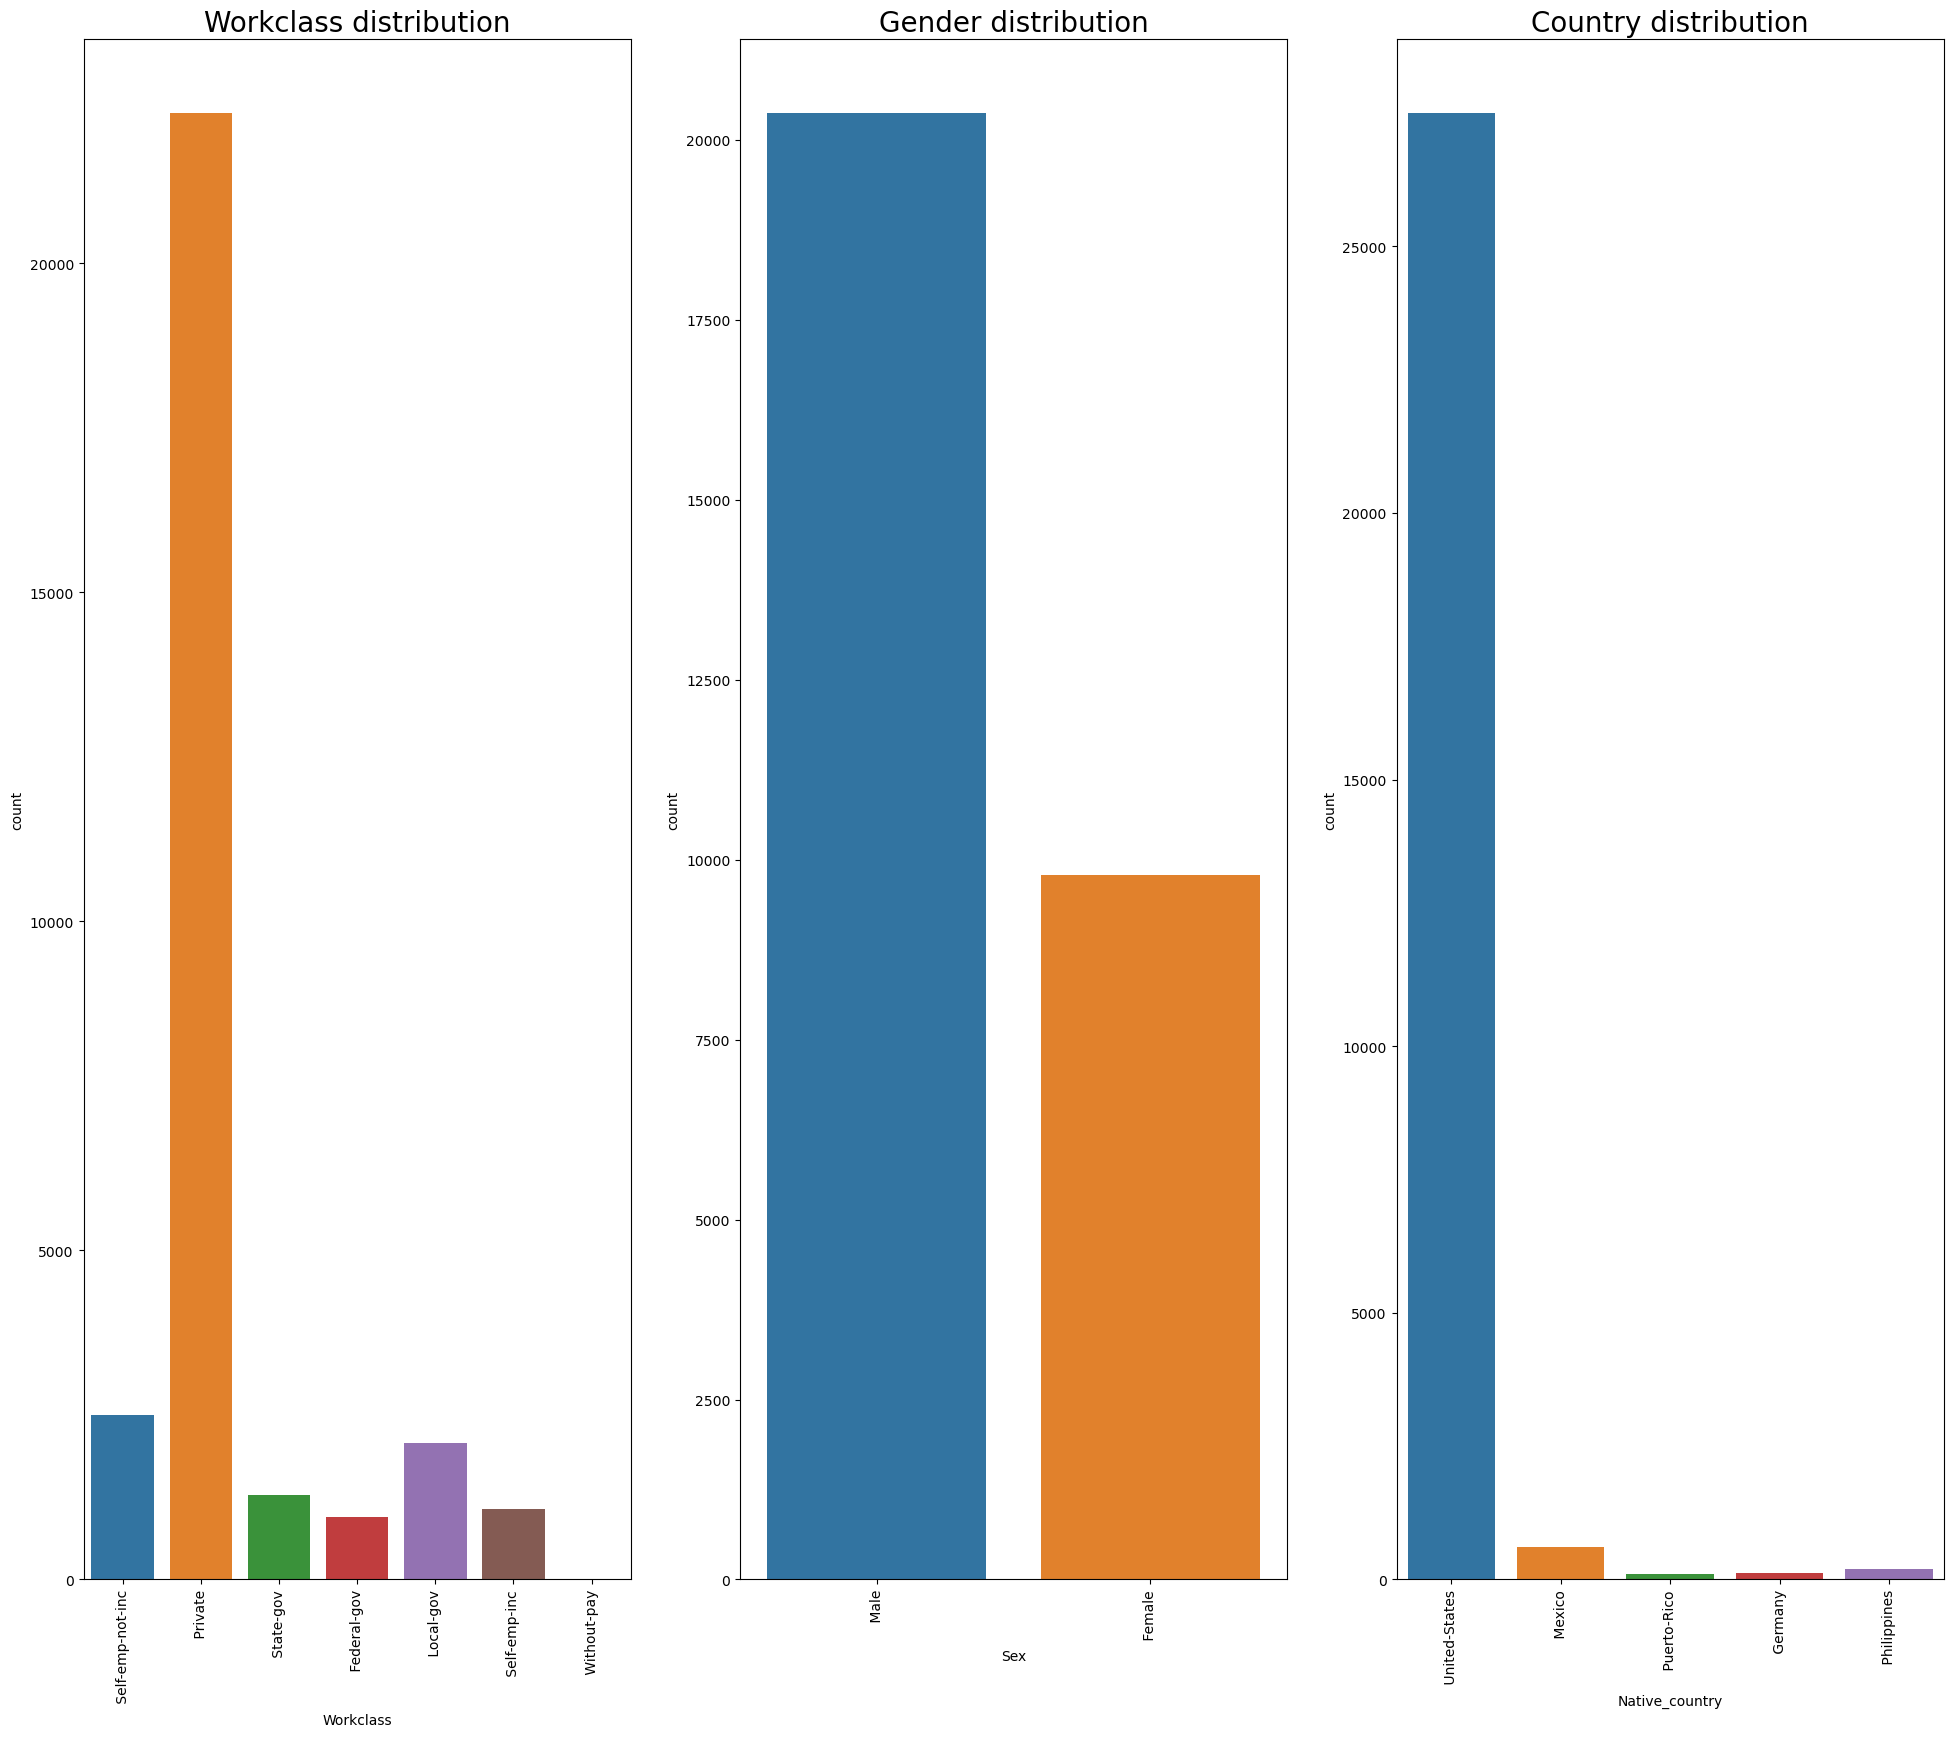

In [40]:
plt.figure(figsize=(24,20))
plt.subplot(1,3,1)
sns.countplot(x='Workclass',data=df)
plt.title('Workclass distribution',fontsize=20)
plt.xticks(rotation=90)
plt.subplot(1,3,2)
sns.countplot(x='Sex',data=df)
plt.title('Gender distribution',fontsize=20)
plt.xticks(rotation=90)
plt.subplot(1,3,3)
top5=df['Native_country'].value_counts().nlargest(5).index
sns.countplot(x='Native_country',data=df[df['Native_country'].isin(top5)])
plt.title('Country distribution',fontsize=20)
plt.xticks(rotation=90)
plt.show()

Workclass Is more Private. 
More male compared to female
USA is highest count

# Preprocessing

In [41]:
le=LabelEncoder()
for col in df.columns:
    if df[col].dtype=='object':
        df[col]=le.fit_transform(df[col])

In [42]:
# storing the Dependent Variables in X and Independent Variable in Y
x_class=df.drop(['Income'],axis=1)
y_class=df['Income']
x_class_train,x_class_test,y_class_train,y_class_test=train_test_split(x_class,y_class,test_size=0.30,random_state=42)

In [43]:
# Scaling the values to convert the int values to Machine Languages
from sklearn.preprocessing import MinMaxScaler
mmscaler=MinMaxScaler(feature_range=(0,1))
x_class_train=mmscaler.fit_transform(x_class_train)
x_class_test=mmscaler.fit_transform(x_class_test)
x_class_train=pd.DataFrame(x_class_train)
x_class_test=pd.DataFrame(x_class_test) 

In [44]:
a_class={'Model Name':[], 'Accuracy Score':[] ,'Precision Score':[] ,'Recall Score':[] ,'F1 Score':[]}
Results_class=pd.DataFrame(a_class)
Results_class.head()

,Model Name,Accuracy Score,Precision Score,Recall Score,F1 Score


In [45]:
# Create objects of Regression / Regressor models with default hyper-parameters

modellog = LogisticRegression()
modeldtc = DecisionTreeClassifier()
modelbagc = BaggingClassifier()
modelrfc = RandomForestClassifier()
# modelSVC = SVC()
modelXGC = xgb.XGBClassifier()
modelKNNC = KNeighborsClassifier(n_neighbors=5)
modelETC = ExtraTreesClassifier()

modelGBC = GradientBoostingClassifier(loss='log_loss', learning_rate=0.1, n_estimators=100, subsample=1.0,
                                     criterion='friedman_mse', min_samples_split=2, min_samples_leaf=1,
                                     min_weight_fraction_leaf=0.0, max_depth=3, min_impurity_decrease=0.0,
                                     init=None, random_state=None, max_features=None, verbose=0, max_leaf_nodes=None, warm_start=False,
                                     validation_fraction=0.1, n_iter_no_change=None, tol=0.0001, ccp_alpha=0.0)

In [46]:
# Evalution matrix for all the algorithms

MM = [modellog, modeldtc, modelbagc, modelrfc, modelXGC, modelKNNC, modelETC,modelGBC]

for models in MM:
    print(models)
    # Fit the model with train data
    
    models.fit(x_class_train, y_class_train)
    
    # Predict the model with test data

    y_class_pred = models.predict(x_class_test)
    
    # Print the model name
    
    print('Model Name: ', models)
    
    # Evaluation metrics for Regression analysis
    from sklearn import metrics

    print('Accuracy Score:', round(accuracy_score(y_class_test, y_class_pred),3))  
    print('Precision Score:', round(precision_score(y_class_test, y_class_pred,average='weighted'),3))  
    print('Recall Score:', round(recall_score(y_class_test, y_class_pred,average='weighted'),3))
    print('F1_Score:', round(f1_score(y_class_test, y_class_pred,average='weighted'),6))
#     print('Area Under Curve:', round(roc_auc_score(y_class_test, y_class_pred,multi_class='ovr'),3))
    
    print('------------------------------------------------------------------------------------------------------------')
    new_row = {'Model Name' : models,
               'Accuracy Score' : round(accuracy_score(y_class_test, y_class_pred),3),
               'Precision Score' : round(precision_score(y_class_test, y_class_pred,average='weighted'),3),
               'Recall Score' : round(recall_score(y_class_test, y_class_pred,average='weighted'),3),
               'F1 Score' : round(f1_score(y_class_test, y_class_pred,average='weighted'),6)
              }
    Results_class = Results_class.append(new_row, ignore_index=True)
    #------------------------------------------------------------

LogisticRegression()
Model Name:  LogisticRegression()
Accuracy Score: 0.819
Precision Score: 0.807
Recall Score: 0.819
F1_Score: 0.8051
------------------------------------------------------------------------------------------------------------
DecisionTreeClassifier()
Model Name:  DecisionTreeClassifier()
Accuracy Score: 0.797
Precision Score: 0.799
Recall Score: 0.797
F1_Score: 0.797769
------------------------------------------------------------------------------------------------------------
BaggingClassifier()
Model Name:  BaggingClassifier()
Accuracy Score: 0.823
Precision Score: 0.815
Recall Score: 0.823
F1_Score: 0.817591
------------------------------------------------------------------------------------------------------------
RandomForestClassifier()
Model Name:  RandomForestClassifier()
Accuracy Score: 0.84
Precision Score: 0.835
Recall Score: 0.84
F1_Score: 0.83662
------------------------------------------------------------------------------------------------------------

In [47]:
models=['LogisticRegression','DecisionTreeClassifier','BaggingClassifier','RandomForestClassifier','XGBClassifier','KNeighborsClassifier','ExtraTreesRegressor','GradientBoostingClassifier']
result_class=pd.DataFrame({'Model_Name':models})
result_class['Accuracy Score']=Results_class['Accuracy Score']
result_class['Recall Score']=Results_class['Recall Score']
result_class['Precision Score']=Results_class['Precision Score']
result_class['F1 Score']=Results_class['F1 Score']
result_class=result_class.sort_values(by='F1 Score',ascending=False).reset_index(drop=True)
result_class

,Model_Name,Accuracy Score,Recall Score,Precision Score,F1 Score
0,GradientBoostingClassifier,0.853,0.853,0.847,0.846758
1,XGBClassifier,0.847,0.847,0.842,0.843211
2,RandomForestClassifier,0.840,0.840,0.835,0.836620
3,ExtraTreesRegressor,0.834,0.834,0.829,0.830660
4,KNeighborsClassifier,0.822,0.822,0.818,0.819961
5,BaggingClassifier,0.823,0.823,0.815,0.817591
6,LogisticRegression,0.819,0.819,0.807,0.805100
7,DecisionTreeClassifier,0.797,0.797,0.799,0.797769


# Gradient Boosting Classifier is the best model for classification.